In [1]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.tsa.stattools import adfuller
import pmdarima
from pmdarima import auto_arima
from statsmodels.tsa.arima.model import ARIMA
from pmdarima.arima import ndiffs
import warnings 
warnings.filterwarnings('ignore')
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from math import sqrt
from sklearn.metrics import mean_squared_error

In [2]:
df=pd.read_csv(r'C:\Users\tonny\Downloads\Googlemonthlydata.csv'
,index_col=['Month'],parse_dates=['Month']).dropna()


In [3]:
df.head()

,Price
Month,
2004-08-01,2.632222
2004-09-01,2.831905
2004-10-01,3.830476
2004-11-01,4.437619
2004-12-01,4.545000


In [4]:
df.tail()

,Price
Month,
2020-08-01,77.251429
2020-09-01,75.574286
2020-10-01,77.095455
2020-11-01,87.170000
2020-12-01,88.385455


In [5]:
df.describe()

,Price
count,197.000000
mean,27.690406
std,20.513924
min,2.632222
25%,12.143333
50%,17.583500
75%,40.080476
max,88.385455


<AxesSubplot: xlabel='Month', ylabel='Price'>

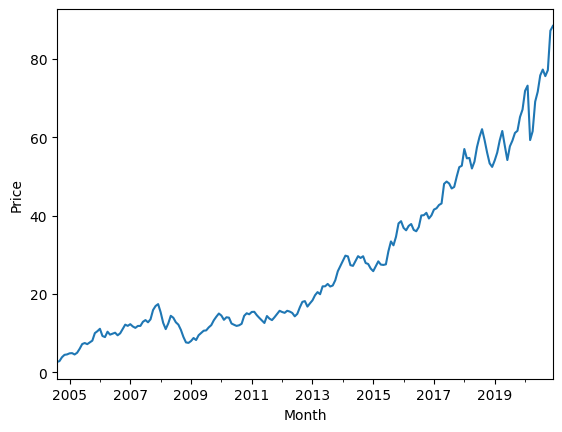

In [6]:
df['Price'].plot(xlabel='Month',ylabel='Price')

In [7]:
#checking if Time Series Is stationary or not
adftest = adfuller(df)
print('P value is:',adftest[1])

P value is: 1.0


In [8]:
x=ndiffs(df)
print(x)

2


In [9]:
ts1=df.diff().dropna()

In [10]:
ts2=ts1.diff().dropna()

In [11]:
#checking if Differenced Time Series Is stationary or not
adftest = adfuller(ts2)
print('P value is:',adftest[1])

P value is: 3.0087145119975087e-06


<AxesSubplot: xlabel='Month'>

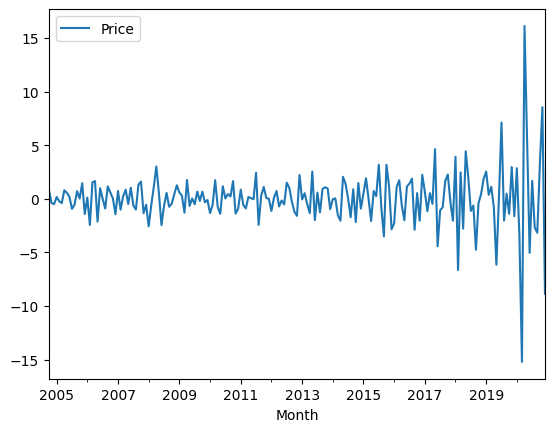

In [12]:
ts2.plot()

In [13]:
#  Finding 80% data set to split into training and testing Part
ts2.count()*0.8

Price    156.0
dtype: float64

In [14]:
# Splitting 80% data as training data and remaing 20% for testing Purpose
train=ts2.iloc[:156]
test=ts2.iloc[156:]
print(train.shape,test.shape)

(156, 1) (39, 1)


In [15]:
#Finding optimum values of p,d,q using Auto Arima Function
stepwise_fit=auto_arima(train['Price'],trace=True,suppress_warnings=True)
stepwise_fit.summary()

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.49 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=548.766, Time=0.02 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=541.939, Time=0.03 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.16 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=546.766, Time=0.02 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=528.269, Time=0.04 sec
 ARIMA(3,0,0)(0,0,0)[0] intercept   : AIC=505.364, Time=0.06 sec
 ARIMA(4,0,0)(0,0,0)[0] intercept   : AIC=501.693, Time=0.06 sec
 ARIMA(5,0,0)(0,0,0)[0] intercept   : AIC=503.391, Time=0.08 sec
 ARIMA(4,0,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.34 sec
 ARIMA(3,0,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.25 sec
 ARIMA(5,0,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.32 sec
 ARIMA(4,0,0)(0,0,0)[0]             : AIC=499.693, Time=0.03 sec
 ARIMA(3,0,0)(0,0,0)[0]             : AIC=503.369, Time=0.03 sec
 ARIMA(5,0,0)(0,0,0)[0]             : AIC=501.391, Time=0.05 sec
 A

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  156
Model:               SARIMAX(2, 0, 1)   Log Likelihood                -234.526
Date:                Thu, 15 Dec 2022   AIC                            477.051
Time:                        14:56:45   BIC                            489.251
Sample:                    10-01-2004   HQIC                           482.006
                         - 09-01-2017                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.3078      0.080      3.833      0.000       0.150       0.465
ar.L2         -0.2247      0.083     -2.694      0.007      -0.388      -0.061
ma.L1         -0.9791      0.027    -36.505      0.000      -1.032      -0.927
sigma2         1.1601      0.100     11.613      0.000       0.964       1.356
===================================================================================
Ljung-Box (L1) (Q):                   0.12   Jarque-Bera (JB):                28.98
Prob(Q):                              0.73   Prob(JB):                         0.00
Heteroskedasticity (H):               2.14   Skew:                             0.51
Prob(H) (two-sided):                  0.01   Kurtosis:                         4.85
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

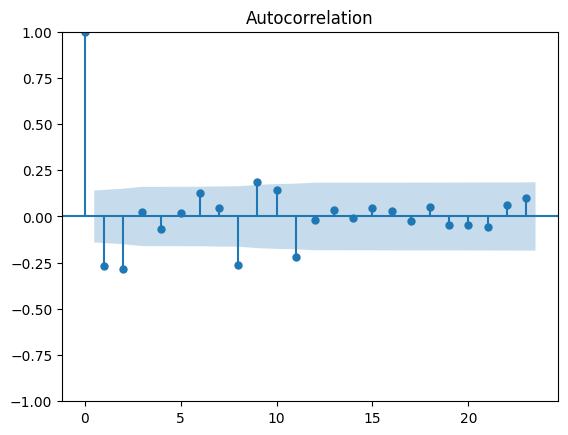

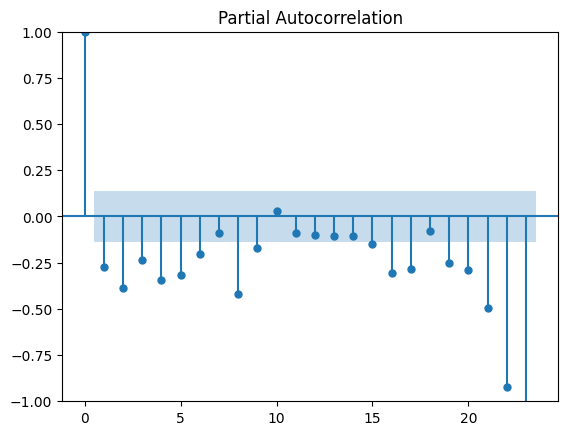

In [16]:
plot_acf(ts2),
plot_pacf(ts2);

In [17]:
#Fitting model as per Training data
model=ARIMA(train['Price'],order=(8,2,2))
model=model.fit()
model.summary()



<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  Price   No. Observations:                  156
Model:                 ARIMA(8, 2, 2)   Log Likelihood                -244.877
Date:                Thu, 15 Dec 2022   AIC                            511.755
Time:                        14:56:46   BIC                            545.161
Sample:                    10-01-2004   HQIC                           525.324
                         - 09-01-2017                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.5769      0.081     -7.118      0.000      -0.736      -0.418
ar.L2         -0.6471      0.108     -5.974      0.000      -0.859      -0.435
ar.L3         -0.6848      0.125     -5.501      0.000      -0.929      -0.441
ar.L4         -0.5037      0.129     -3.904      0.000      -0.757      -0.251
ar.L5         -0.3563      0.128     -2.781      0.005      -0.607      -0.105
ar.L6         -0.4143      0.117     -3.554      0.000      -0.643      -0.186
ar.L7         -0.2753      0.113     -2.436      0.015      -0.497      -0.054
ar.L8         -0.1674      0.072     -2.339      0.019      -0.308      -0.027
ma.L1         -1.9951      0.432     -4.616      0.000      -2.842      -1.148
ma.L2          0.9963      0.434      2.298      0.022       0.146       1.846
sigma2         1.2179      0.504      2.417      0.016       0.230       2.206
===================================================================================
Ljung-Box (L1) (Q):                   0.02   Jarque-Bera (JB):                 2.86
Prob(Q):                              0.90   Prob(JB):                         0.24
Heteroskedasticity (H):               1.84   Skew:                             0.13
Prob(H) (two-sided):                  0.03   Kurtosis:                         3.62
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [18]:
start=len(train)
end=len(train)+len(test)-1
print(len(train),len(test))

156 39


In [19]:
pred=model.predict(start=start,end=end,type='levels')
print(pred)

2017-10-01    1.147190
2017-11-01   -0.922416
2017-12-01    0.102746
2018-01-01    0.119749
2018-02-01    0.724636
2018-03-01   -0.767523
2018-04-01   -0.597659
2018-05-01    0.072254
2018-06-01    0.518938
2018-07-01    0.303951
2018-08-01   -0.301486
2018-09-01   -0.068887
2018-10-01    0.110596
2018-11-01    0.145026
2018-12-01   -0.167444
2019-01-01   -0.180670
2019-02-01    0.066751
2019-03-01    0.170789
2019-04-01    0.067029
2019-05-01   -0.095293
2019-06-01   -0.036525
2019-07-01    0.050058
2019-08-01    0.041099
2019-09-01   -0.041070
2019-10-01   -0.046797
2019-11-01    0.028874
2019-12-01    0.055785
2020-01-01    0.014134
2020-02-01   -0.029665
2020-03-01   -0.010724
2020-04-01    0.020404
2020-05-01    0.014770
2020-06-01   -0.010004
2020-07-01   -0.010928
2020-08-01    0.011386
2020-09-01    0.018220
2020-10-01    0.003391
2020-11-01   -0.008660
2020-12-01   -0.001887
Freq: MS, Name: predicted_mean, dtype: float64


<AxesSubplot: xlabel='Month'>

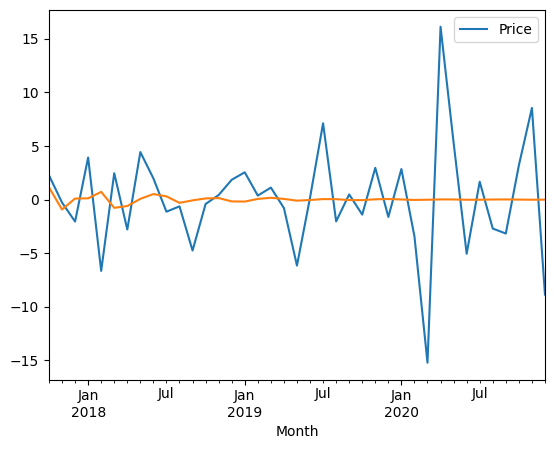

In [20]:
ax=test.plot()
pred.plot(ax=ax)


In [21]:
error=np.sqrt(mean_squared_error(test,pred))
error

5.063770599768077

In [22]:
test['Price'].mean()

0.021020016410256533

In [23]:
type(pred)

pandas.core.series.Series

In [24]:
Pred_frame=pred.to_frame()
Pred_frame.columns=['Price']
Diff_forecast=train.append(Pred_frame)

In [26]:
def inverse_diff(series,last_observation):

    series_undifferenced = series.copy()

    series_undifferenced.iat[0] = series_undifferenced.iat[0] + last_observation

    series_undifferenced = series_undifferenced.cumsum()

    return series_undifferenced

In [27]:

inverse_1 = inverse_diff(Diff_forecast['Price'],ts1.iloc[0,0])

In [28]:
inverse = inverse_diff(inverse_1,df.iloc[0,0])

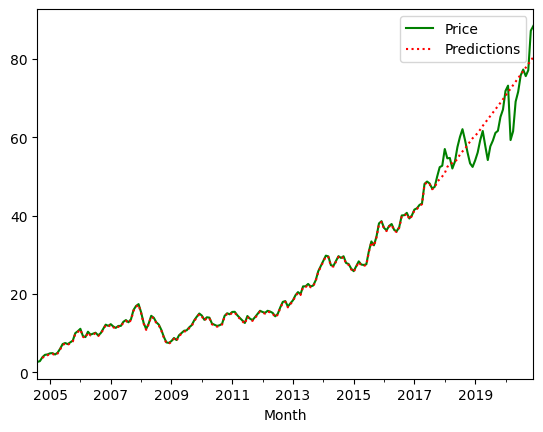

In [29]:
ax = df.plot(color='Green',label="Price")
inverse.plot(ax=ax,color='Red',linestyle='dotted',label="Predictions")
plt.legend()
plt.show()

In [30]:
# pred.to_excel(r'C:\Users\tonny\Downloads\For Report_Predictions.xlsx',sheet_name='Predictions', index=True)
# test.to_excel(r'C:\Users\tonny\Downloads\For Report_test.xlsx', sheet_name='Test', index=True)
# ts1.to_excel(r'C:\Users\tonny\Downloads\For report_ts1.xlsx', sheet_name='ts1', index=True)
# train.to_excel(r'C:\Users\tonny\Downloads\For Report_train.xlsx',index=True)



In [31]:
# pred.to_excel(r'C:\Users\tonny\Downloads\For Report_Predictions.xlsx',sheet_name='Predictions', index=True)
inverse.to_excel(r'C:\Users\tonny\Downloads\For Report_Inverse.xlsx',sheet_name='Inverse', index=True)
